# Einsendeaufgabe 4

## Aufgabe 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt


#simuliert n-Jahre Wachstum
#formale Parameter sind:
#n Anzahl der Jahre
#r Erntemenge
#x Startwert
def sim(n, r, x):
    result = np.empty(n+1)
    result[0] = x

    for i in range(1, n+1):
        x = x * (4 - x) - r
        result[i] = x

    return result

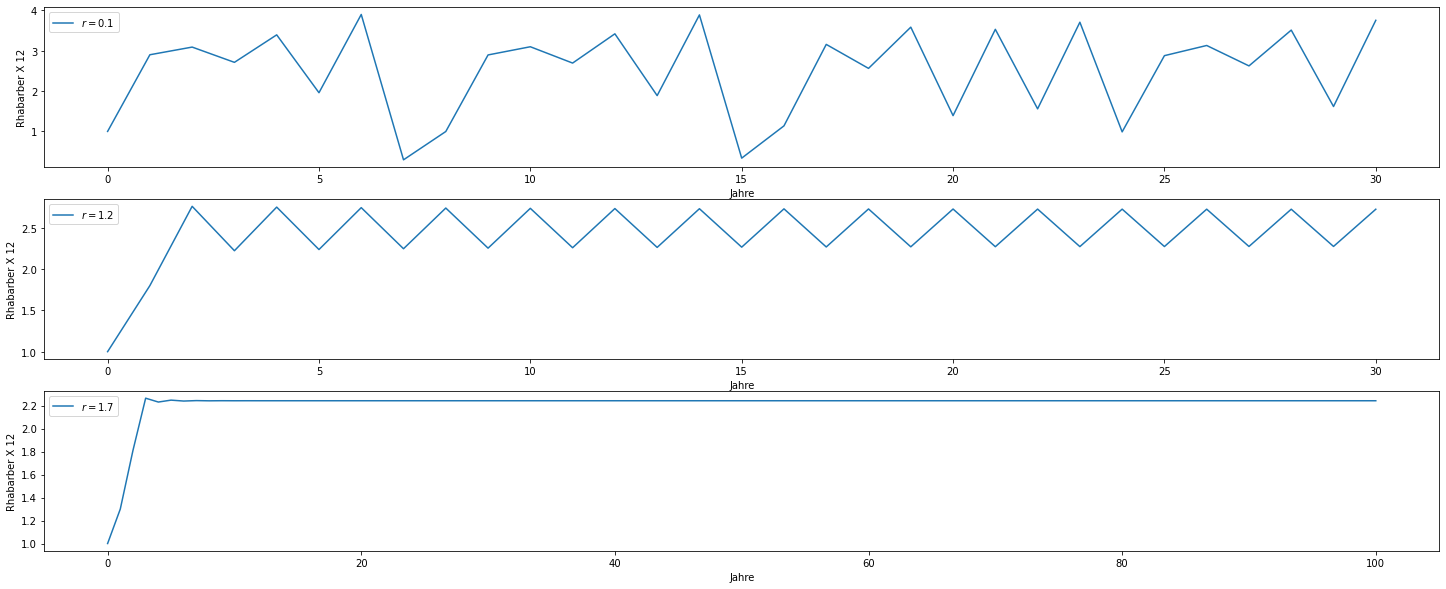

In [2]:
plt.figure(figsize=(25,10))


#simuliert 30 Jahre und 0.1 Erntemenge
data = sim(n=30, r=0.1, x=1)
plt.subplot(3, 1, 1)
plt.xlabel('Jahre')
plt.ylabel('Rhabarber X 12')
plt.plot(data, label=r'$r=0.1$')
plt.legend()


#simuliert 30 Jahre und 1.2 Erntemenge
data = sim(n=30, r=1.2, x=1)
plt.subplot(3, 1, 2)
plt.xlabel('Jahre')
plt.ylabel('Rhabarber X 12')
plt.plot(data, label=r'$r=1.2$')
plt.legend()


#simuliert 30 Jahre und 1.7 Erntemenge
data = sim(n=100, r=1.7, x=1)
plt.subplot(3, 1, 3)
plt.xlabel('Jahre')
plt.ylabel('Rhabarber X 12')
plt.plot(data, label=r'$r=1.7$')
plt.legend()


plt.show()

Für $r=0.1$ zeigt die Abblidung ein chaotisches Verhalten. Für $r=1.2$ hat die Abbildung zwei Häufungspunkte, $2$ und $3$ und für $r=1.7$ nähert sich die Abbildung einem Fixpunkt bei $\approx 2.4$ an

## Aufgabe 1.2

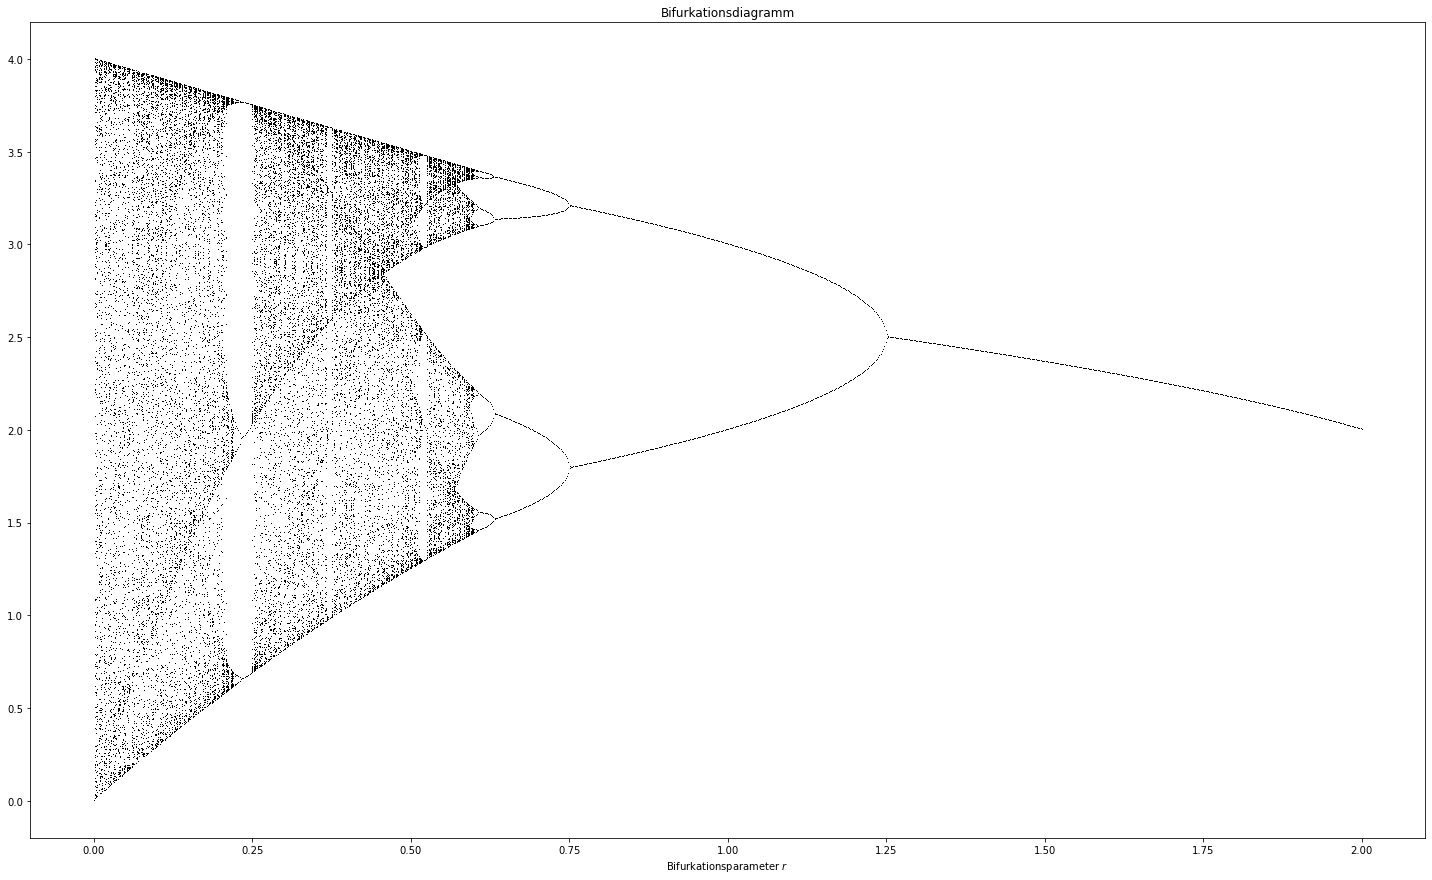

In [3]:
#1000 äquidistante Schritte im Intervall [0,2]
steps = np.linspace(0, 2, 1000)
plt.figure(figsize=(25,15))


for r in steps:
    data = sim(n=1000, r=r, x=2)
    plt.plot([r]*100, data[900:1000], ',k')  #Plotet die letzten 100 Werte an der Stelle r


plt.title('Bifurkationsdiagramm')
plt.xlabel(r'Bifurkationsparameter $r$')
plt.show()

## Aufgabe 1.3

* Für Fixpunkte gilt, $x=\Phi(x)$. Durch Umformen der Ausgangsgleichung flogt $x_{1,2}= \frac{3}{2} \pm \sqrt{(\frac{3}{2})^2-1}$. 
Die Fixpunkte sind $x_1 \approx 2.618$ und $x_2 \approx 0.382$. Trivialerweise ist $x_0 = 0$ natürlich auch ein Fixpunkt. <br>
Um die Stabilität der Fixpunkte zu bewerten, wird der Betrag der ersten Ableitung $|\Phi'(x)|$ benötigt.
Mit $|\Phi'(x)| = |4-2x|$ finden wir für $x_1$ den Betrag $1.236$ und für $x_2$ $3.236$. Da beide Beträge $>1$ sind, sind beide Fixpunkte abstoßend.
Daraus lässt sich schließen, dass für Startwerte $<x_2$ die Population ausstribt.<br>

* Ausgehend von der Idee, dass die erste Gabelung bei $r=1.25$ liegt, da die erste Ableitung der Abblidung nur für Werte von $x$ im Intervall $]1.5,2.5[$ einen Betrag $|4-2x|<1$ liefert, als auch dass die Distanz zur nächten Gabelung $|1.25-0.75|=0.5$ beträgt(was natürlich auch erst zu zeigen wäre) und sich die Distanz zu jeder weiteren Gabelung um den Faktor $\frac{3}{13}$ verringert, beginnt das Chaos bei $r = 1.25 - 0.5\sum_{i=0}^\infty (\frac{3}{13})^i = 0.6$.

* Für $r=0$ zeigt die Abblidung für alle Startwerte $x_0 \not\in \{0, 1, 2, 3, 4\}$ im Intervall $[0,4]$ ein chaotische Verhalten. Für gerade $x_0$ wird die Abbildung konstant $0$ und für ungerade $x_0$ kanstant $3$.

## Aufgabe 2.1

Für Fixpunkte einer kontinuierlichen Abbildung gilt, dass die Wachtumsrate verschwindet, also dass bei $\frac{dx}{dt}=f(x,y)x$ und $\frac{dy}{dt}=g(x,y)y$, $f(x,y)=g(x,y)=0$ gilt.<br> Mit $f(x,y)= \alpha+\beta y=0$ und $g(x,y)=\gamma+ \delta x=0$, findet sich an der Stelle $(5,5)$ ein Fixpunkt. Trivialerweise ist $(x,y)=(0,0)$ natürlich auch ein Fixpunkt.

## Aufgabe 2.2

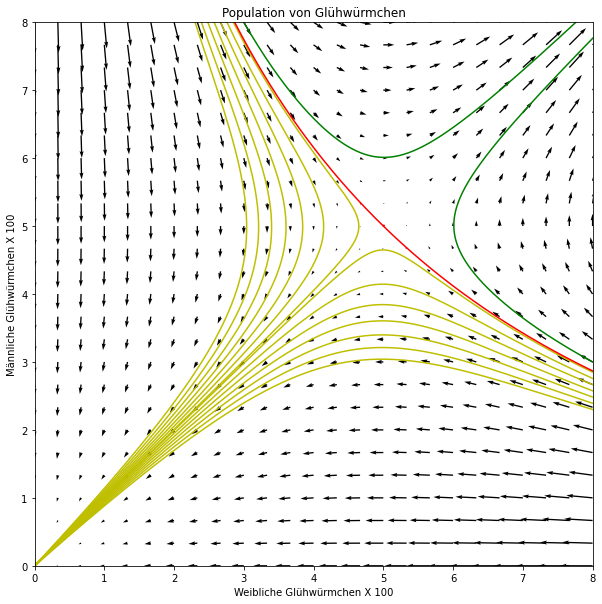

In [4]:
import numpy as np
import matplotlib.pyplot as plt


#Modellfunktion
def func(x, y, t, alpha=0.5, beta=0.1, gamma=0.5, delta=0.1):

    dxdt = -alpha * x + beta * x * y
    dydt = -gamma * y + delta * x * y

    return [dxdt, dydt]



def explizites_eulerverfahren(x, y, t0=0, tn=20, n=500):
    h = (tn - t0) / n  # Zeitschritte

    result = np.empty(shape=(n + 1, 2))
    result[0] = x, y
    timesteps = np.linspace(t0, tn, n + 1)

    for i in range(1, n + 1):
        tmp = func(x, y, timesteps[i])
        x = x + h * tmp[0]
        y = y + h * tmp[1]
        result[i] = x, y

    return result


#Einstellung für Größe und Grenzen des Graphen.
plt.figure(figsize=(10, 10))
plt.xlim(0, 8)
plt.ylim(0, 8)

#Erstellt das Vektorfeld
g = np.linspace(0, 8, 25)
X, Y = np.meshgrid(g, g)
U, V = func(X, Y, None)
plt.quiver(X, Y, U, V)


#Berechnet die Trajektorie für verschiedene Werte zwischen 2.3 und 2.85
#Im Graphen als gelbe Kurven dargestellt.
for c in np.linspace(2.3, 2.85, 7):
    data = explizites_eulerverfahren(x=8, y=c)
    plt.plot(data[:, 1], data[:, 0], 'y')
    data = explizites_eulerverfahren(x=c, y=8)
    plt.plot(data[:, 1], data[:, 0], 'y')


#Berechnung für Startpunkte bei denen expotentielles Wachstum folgt
#außerhalb der for-Schleife, da es sonst zu einer overflow-Warunung kommt.
data = explizites_eulerverfahren(x=8, y=3)
plt.plot(data[:, 1], data[:, 0], 'g')
data = explizites_eulerverfahren(x=3, y=8)
plt.plot(data[:, 1], data[:, 0], 'g')


#Berechnet zwei Trajektorien, die von beiden Seiten annähernt auf
#den Sattelpunkt stoßen. Rote Kurve im Graph.
data = explizites_eulerverfahren(x=2.868162, y=8)
plt.plot(data[:, 1], data[:, 0], 'r')
data = explizites_eulerverfahren(x=8, y=2.868162)
plt.plot(data[:, 1], data[:, 0], 'r')



plt.title('Population von Glühwürmchen')
plt.xlabel('Weibliche Glühwürmchen X 100')
plt.ylabel('Männliche Glühwürmchen X 100')
plt.show()


## Aufgabe 2.3

* $(x,y)=(0,0)$ ist ein anziehender Fixpunkt und $(x,y)=(5,5)$ ist ein abstoßender Fixpunkt bzw. ein Sattelpunkt.
* Die Glühwürmchen überleben für Anfangswerte die auf oder oberhalb der roten Linie liegen. Für $(8,c)$ und $(c,8)$ ist das $c \approx 2.868$. Ich habe versucht einen geschlossenen Ausdruck zu finden, welcher diese rote Kurve beschreibt, bin aber nicht weiter gekommen. So eine Abbildung müsste stetig und streng monoton fallend sein, mit $\lim_{x \to 0} f(x,y)=y= \infty$ und $\lim_{x \to \infty} f(x,y)=y= 0$. Die Gleichung
\begin{align*}
\frac{1}{\ln(0.2x)} + \frac{1}{\ln(0.2y)}-\frac{1}{3} = 0
\end{align*}
scheint ganz gut zu passen.
* Populationen die unterhalb einer gegebene Grenze liegen sterben auf jeden Fall aus. Populationen die oberhalt dieser Grenze liegen werden gegebenenfalls zuerst schrumpfen, bis sie ab einem bestimmten Zeitpunkt unbeschränkt exponentiell Wachsen.

## Aufgabe 2.4

Der Fixpunkt bei $(0,0)$ andert sich nicht durch das verändern der Parameter, der zweite Fixpunkt wird durch das verändern der Parameter $\alpha, \beta$ entlang der y-Achse verschoben und durch das verändern von $\gamma, \delta$ entlang der x-Achse.

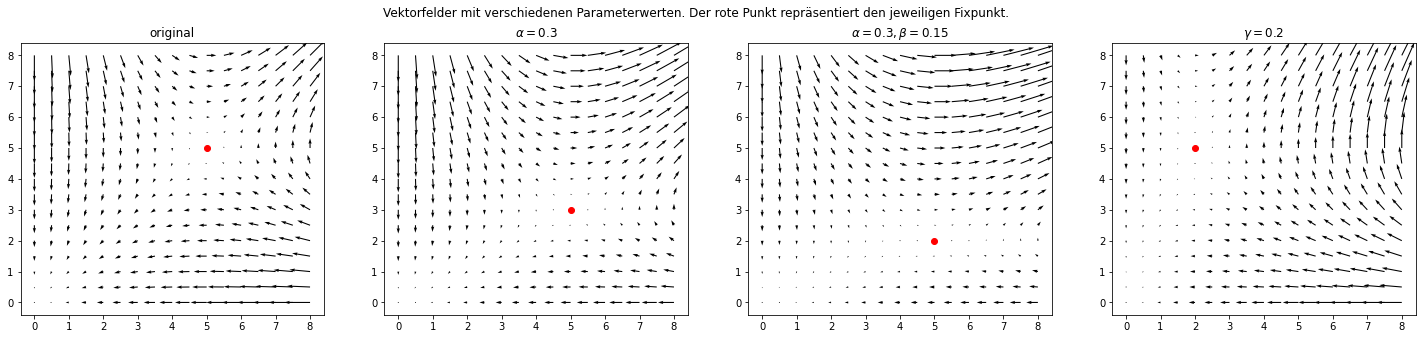

In [5]:
#Plottet vier Vektorfelder mit verschiedenen Parameterwerten

plt.figure(figsize=(25,5))

a=0.5
b=0.1
c=0.5
d=0.1

g = np.linspace(0, 8, 17)
X, Y = np.meshgrid(g, g)


plt.subplot(1, 4, 1)
plt.title('original')
U, V = func(X, Y, None, alpha=a, beta=b, gamma=c, delta=d)
plt.plot((c/d), (a/b), 'or')
plt.quiver(X, Y, U, V)


a=0.3
plt.subplot(1, 4, 2)
plt.title(r'$\alpha=0.3$')
U, V = func(X, Y, None, alpha=a, beta=b, gamma=c, delta=d)
plt.plot((c/d), (a/b), 'or')
plt.quiver(X, Y, U, V)


b=0.15
plt.subplot(1, 4, 3)
plt.title(r'$\alpha=0.3, \beta=0.15$')
U, V = func(X, Y, None, alpha=a, beta=b, gamma=c, delta=d)
plt.plot((c/d), (a/b), 'or')
plt.quiver(X, Y, U, V)


a=0.5
b=0.1
c=0.2
plt.subplot(1, 4, 4)
plt.title(r'$\gamma=0.2$')
U, V = func(X, Y, None, alpha=a, beta=b, gamma=c, delta=d)
plt.plot((c/d), (a/b), 'or')
plt.quiver(X, Y, U, V)


plt.suptitle('Vektorfelder mit verschiedenen Parameterwerten. Der rote Punkt repräsentiert den jeweiligen Fixpunkt.')
plt.show()



## Aufgabe 2.5

Das Modell könnte durch das hinzunehmen von dichteunabhängigen Faktoren wie Jahreszeit oder landwirtschaftliche Faktoren und dichteabhängige Faktoren wie intraspezifische Konkurrenz, 
Infektionskrankheiten oder Fressfeinden verbessert werden.

## Aufgabe 3

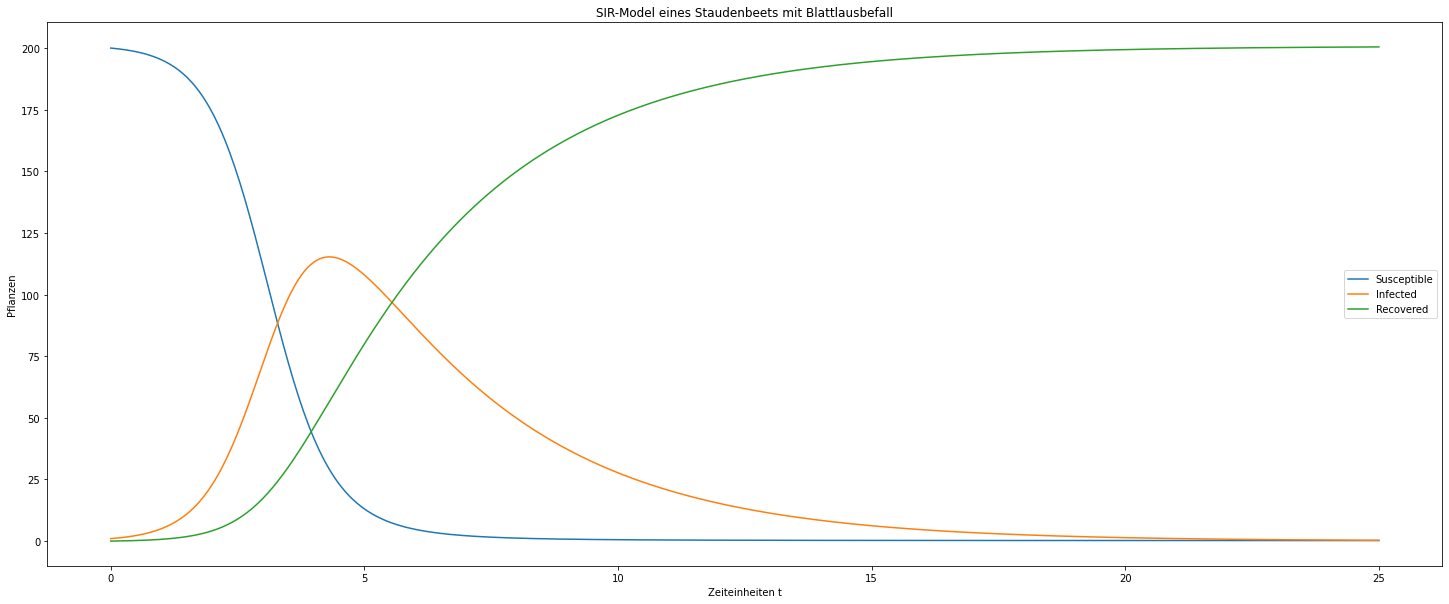

In [6]:
import numpy as np
import matplotlib.pyplot as plt


#Modellfunktionen SIR-Modell
#s steht für Susceptible,
#r für Recovered und 
#i für Infected
def func(s, i, alpha=0.3, beta=0.01):

    dsdt = -beta * s * i
    drdt = alpha * i
    didt = -dsdt - drdt

    return dsdt, didt, drdt



def explizites_eulerverfahren(s=200, i=1, t0=0, tn=25, n=500):
    h = (tn - t0) / n  # Zeitschritte
    r = 0

    result = np.empty(shape=(n + 1, 3))
    result[0] = s, i, r
    timesteps = np.linspace(t0, tn, n + 1)

    for j in range(1, n + 1):
        tmp = func(s, i)
        s = s + h * tmp[0]
        i = i + h * tmp[1]
        r = r + h * tmp[2]
        result[j] = s, i, r

    return result


data = explizites_eulerverfahren()
plt.figure(figsize=(25,10))
steps = np.linspace(0, 25, 501)


plt.plot(steps, data[:, 0], label='Susceptible')
plt.plot(steps, data[:, 1], label='Infected')
plt.plot(steps, data[:, 2], label='Recovered')


plt.legend()
plt.title('SIR-Model eines Staudenbeets mit Blattlausbefall')
plt.xlabel('Zeiteinheiten t')
plt.ylabel('Pflanzen')
plt.show()

* Nach 25 Zeitschritten sinkt der Wert für infizierte Pflanzen auf $I \approx 0.31$. Diesen Wert kann man so verstehen, dass $\frac{I}{N}$ die Wahrscheinlichkeit angiebt, nach welcher eine beliebige Pflanze aus dem Beet infiziert ist. Da der Wert für $I$ nur im Grenzwert $\lim_{t\rightarrow \infty} = 0$ wird, kann man sich ausschließlich anhand des Modells nie sicher sein, ob alle Blattläuse das Beet verlassen haben.

* Um das erneute infizieren der Pflanzen zu simulieren, eignet sich das SIS-Model. Der Wert von S und I befindet sich irgendwann in einem Gleichgewicht.
Das Differentialgleichungssstem könnte folgendermaßen aussehen,

\begin{align*}
\frac{dS}{dt}= -\beta SI + \alpha I \\
\frac{dI}{dt}= \beta SI - \alpha I.
\end{align*}


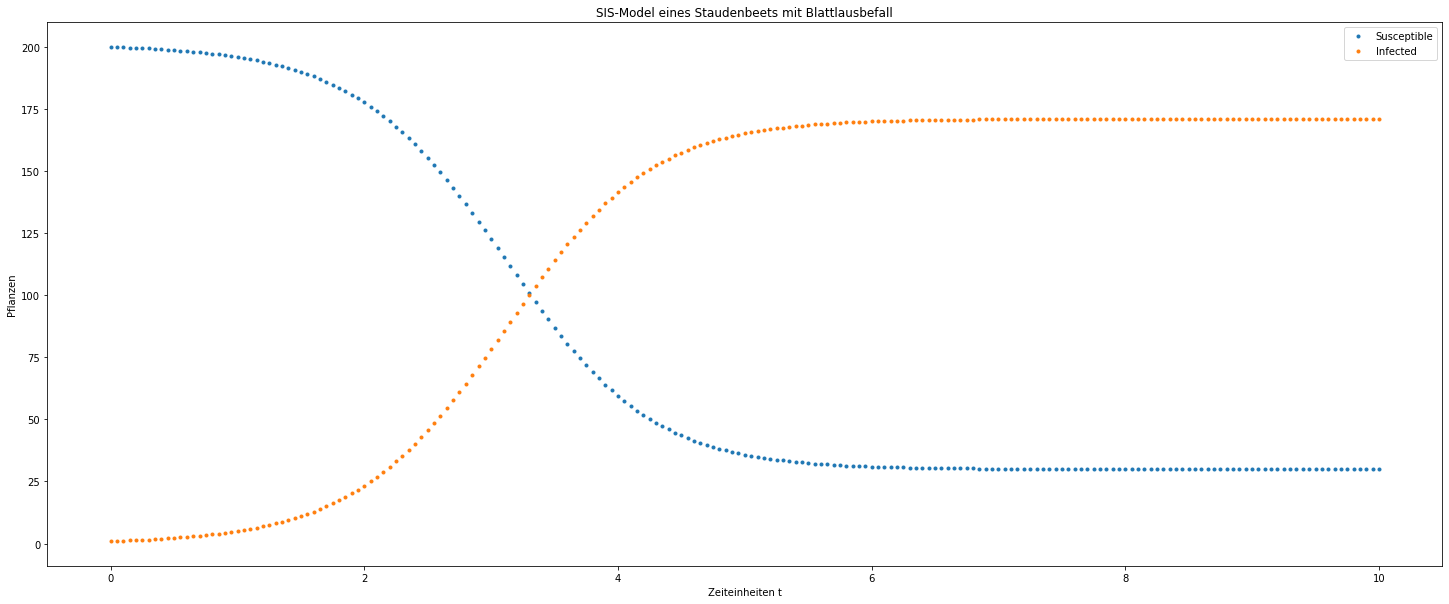

In [7]:
#Modellfunktionen SIS-Modell
def func(s, i, alpha=0.3, beta=0.01):

    dsdt = -beta * s * i + alpha*i
    didt =  beta * s * i - alpha*i

    return dsdt, didt


def explizites_eulerverfahren(s=200, i=1, t0=0, tn=10, n=200):
    h = (tn - t0) / n  # Zeitschritte

    result = np.empty(shape=(n + 1, 2))
    result[0] = s, i
    timesteps = np.linspace(t0, tn, n + 1)

    for j in range(1, n + 1):
        tmp = func(s, i)
        s = s + h * tmp[0]
        i = i + h * tmp[1]
        result[j] = s, i

    return result


data = explizites_eulerverfahren()
plt.figure(figsize=(25,10))
steps = np.linspace(0, 10, 201)


plt.plot(steps, data[:, 0], '.', label='Susceptible')
plt.plot(steps, data[:, 1], '.', label='Infected')


plt.legend()
plt.title('SIS-Model eines Staudenbeets mit Blattlausbefall')
plt.xlabel('Zeiteinheiten t')
plt.ylabel('Pflanzen')
plt.show()

## Aufgabe 4.1

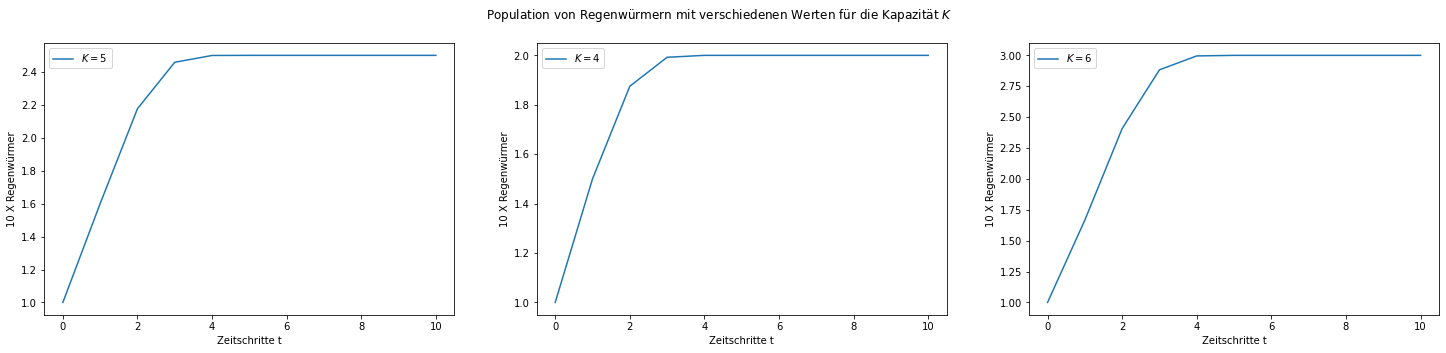

In [8]:
import numpy as np
import matplotlib.pyplot as plt


#Simulation über n Zeitschritte
def sim(n, r, k, x=1):
    result = np.empty(n+1)
    result[0] = x

    for i in range(1, n+1):
        x = r * x * (1 - x/k)
        result[i] = x

    return result


plt.figure(figsize=(25,5))


plt.subplot(1, 3, 1)
data = sim(10, 2, 5)
plt.ylabel('10 X Regenwürmer')
plt.xlabel('Zeitschritte t')
plt.plot(data, label=r'$K=5$')
plt.legend()


plt.subplot(1, 3, 2)
data = sim(n=10, r=2, k=4)
plt.ylabel('10 X Regenwürmer')
plt.xlabel('Zeitschritte t')
plt.plot(data, label=r'$K=4$')
plt.legend()


plt.subplot(1, 3, 3)
data = sim(n=10, r=2, k=6)
plt.ylabel('10 X Regenwürmer')
plt.xlabel('Zeitschritte t')
plt.plot(data, label=r'$K=6$')
plt.legend()


plt.suptitle(r'Population von Regenwürmern mit verschiedenen Werten für die Kapazität $K$')
plt.show()

* Sollte die Startmenge $x_0$ größer sein als die Kapazität $K$ wird der Term $(1-\frac{x_0}{K})$ negativ und somit auch die Population des nächsten Zeitschrittes. Anschließend geht die Abbildung exponentiell gegen $-\infty$.

* Je näher die Population an die Kapazitätsgrenze, desto weniger Rohstoffe(zb. Nahrung oder Lebensruam) stehen pro Individuum zur verfügung, was das Wachstum reduziert.

## Aufgabe 4.2

Der ersrte Fixpunkt lässt sich bei $x_1=0$ finden. Für den zweiten Fixpunkt gilt $x_2=5\frac{1-r}{r}$. Um die Stabilität zu untersuchen wird die erste Ableitung $\Phi'(x)=r-\frac{2rx}{5}$ benötigt.<br>
Dann gilt für die Stabilität von $x_1$,

\begin{align*}
|\Phi'(0)|=|r|
\left\{
\begin{matrix}
<1 ~~ für ~~~ 0 \leq r<1 \\
>1 ~~ für ~~~ 1< r \leq 4
\end{matrix}
\right.
\end{align*}

und für den zweiten Fixpunkt gilt,

\begin{align*}
|\Phi'(5\frac{1-r}{r})|=|2-r|
\left\{
\begin{matrix}
>1 ~~ für ~~~ 0 \leq r<1 \\
<1 ~~ für ~~~ 1< r \leq 3 \\
>1 ~~ für ~~~ 3 < r \leq 4.
\end{matrix}
\right.
\end{align*}

## Aufgabe 5.1

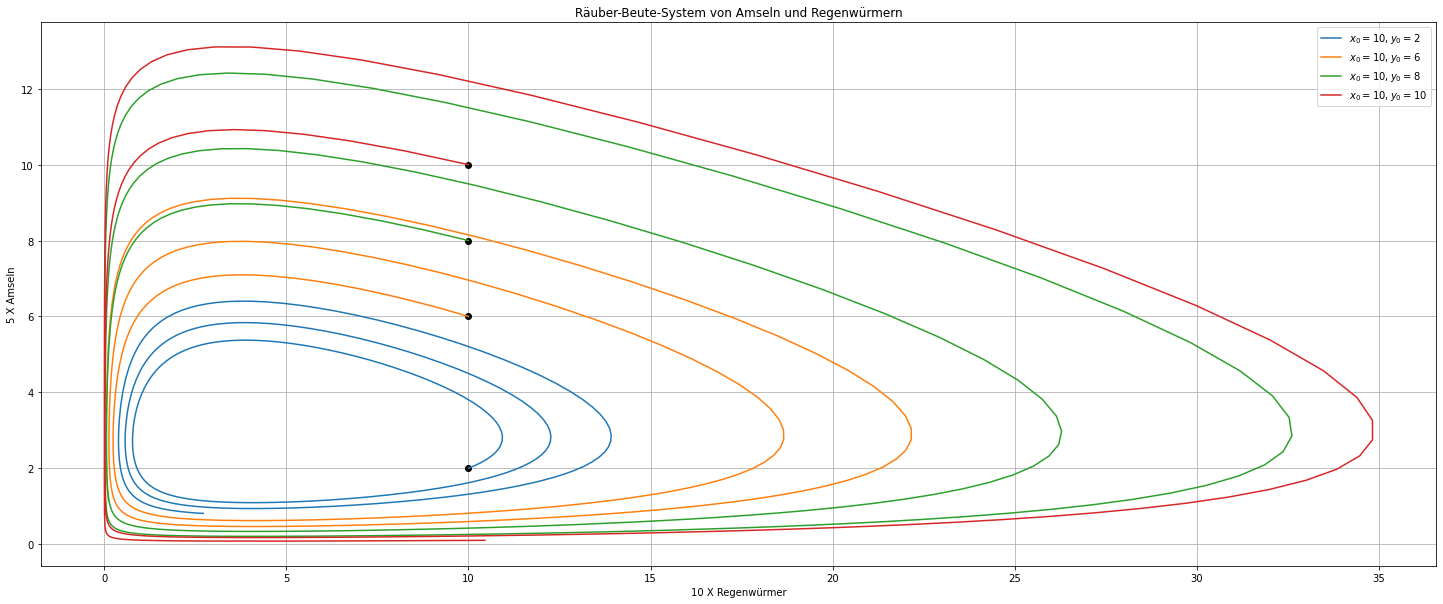

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def func(x, y, t):
    
    dxdt = 1.1*x - 0.4*x*y
    dydt = 0.1*x*y - 0.4*y
    
    return dxdt, dydt


def explizites_eulerverfahren(x, y, t0=0, tn=30, n=500):
    h = (tn - t0) / n  # Zeitschritte

    result = np.empty(shape=(n + 1, 2))
    result[0] = x, y
    timesteps = np.linspace(t0, tn, n + 1)

    for i in range(1, n + 1):
        tmp = func(x, y, timesteps[i])
        x = x + h * tmp[0]
        y = y + h * tmp[1]
        result[i] = x, y

    return result


plt.figure(figsize=(25, 10))


#Plottet die Trajektorie für verschiedene Anfangswerte der Amselpopulation
for i in (2, 6, 8, 10):
    data = explizites_eulerverfahren(x=10, y=i)
    plt.plot(10, i, 'ok')    #Startpunkt
    plt.plot(data[:, 0], data[:, 1], label=r'$x_0=10, y_0={}$'.format(i))
    

plt.title('Räuber-Beute-System von Amseln und Regenwürmern')
plt.xlabel('10 X Regenwürmer')
plt.ylabel('5 X Amseln')
plt.legend()
plt.grid()
plt.show()

* Es gibt einen abstoßenden Fixpunkt bei $(x,y)=(4,2.75)$, um den die Trajektorien unabhängig vom Startwert immer weitere Orbits ziehen (bis auf die Startpunkte $(0,0)$ und $(4,2.75)$).
* Langfristig gesehen, werden unabhängig vom Startwert beide Populationen aussterben, denn ab einen bestimmten Zeitpunkt wird es immer so viele Räuber geben, dass diese alle Beutetiere verbrauchen, 
was in der Folge dann auch zum Aussterben der Raubtiere führt.

## Aufgabe 5.2

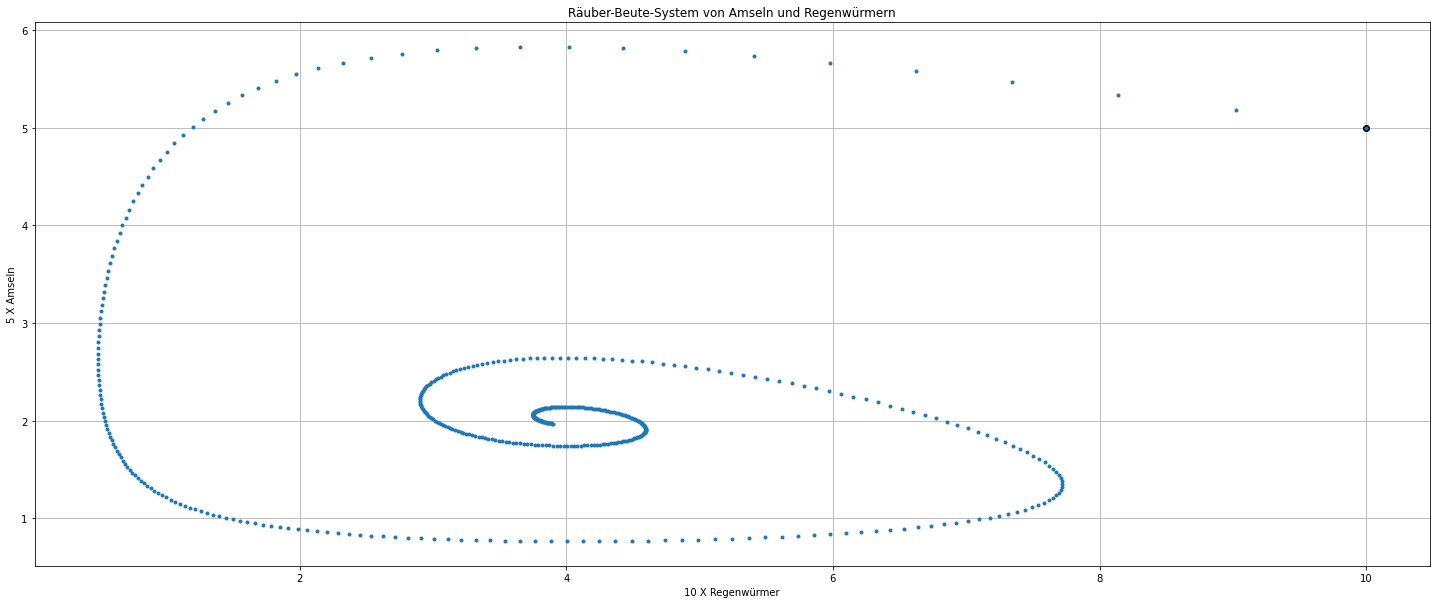

In [10]:
def func(x, y, t):
    
    dxdt =  1.1*x*(1 - x/15) - 0.4*x*y
    dydt = 0.1*x*y - 0.4*y
    
    return dxdt, dydt


plt.figure(figsize=(25, 10))


data = explizites_eulerverfahren(x=10, y=5)
plt.plot(10, 5, 'ok') #Startpunkt
plt.plot(data[:, 0], data[:, 1], '.')


plt.title('Räuber-Beute-System von Amseln und Regenwürmern')
plt.xlabel('10 X Regenwürmer')
plt.ylabel('5 X Amseln')
plt.grid()
plt.show()

* In diesem Modell gibt es einen anziehenden Fixpunkt bei $(x,y)=(4,\frac{121}{60})$, um den die Trajektorien unabhängig vom Startwert immer enger werdende Bahnen ziehen und sich dem Fixpunkt annähern.
* Es wird nach einem langen Zeitraum eine stabile Population von 40 Regenwürmern und 10 Amseln geben.